In [21]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [40]:
foreground = cv2.imread("Downloads/train.jpeg")

In [41]:
grayimage = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

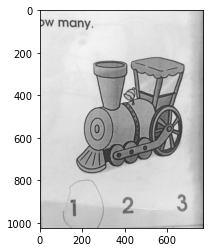

In [42]:
#Show the image with matplotlib
plt.imshow(cv2.cvtColor(grayimage, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
g_blurred = cv2.GaussianBlur(grayimage, (5, 5), 0)

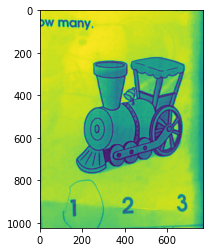

In [44]:
#Show the image with matplotlib
plt.imshow(g_blurred)
plt.show()

In [45]:
BLUR = 5
CANNY_THRESH_1 = 100
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 20
MASK_ERODE_ITER = 20
MASK_COLOR = (0.0,0.0,0.0) # In BGR format

In [46]:
v = np.median(grayimage)

#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - 0.33) * v))
upper = int(min(255, (1.0 + 0.33) * v))
edged = cv2.Canny(grayimage, lower, upper)

In [96]:
#edges = cv2.Canny(g_blurred, CANNY_THRESH_1, CANNY_THRESH_2)
edged = cv2.dilate(edged, None)
edged = cv2.erode(edged, None)

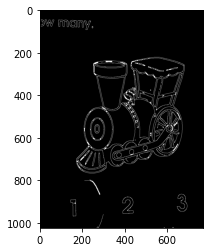

In [97]:
#Show the image with matplotlib
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

In [98]:
#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [99]:
for c in contours:
    contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))


In [100]:
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)

In [101]:
len(contour_info)

218

In [105]:
smallset = contour_info[0:20]

In [106]:
mask = np.zeros(edges.shape)
for c in smallset:
    cv2.fillConvexPoly(mask, c[0], (255))

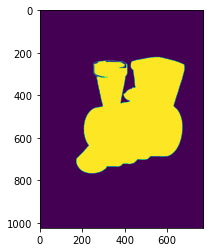

In [107]:
#Show the image with matplotlib
plt.imshow(mask)
plt.show()

In [108]:
#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

In [109]:
#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = foreground.astype('float32') / 255.0                 #  for easy blending
    
masked = (mask_stack * foreground) + ((1 - mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

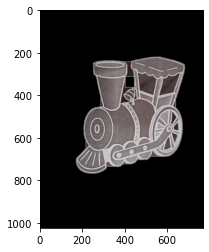

In [110]:
plt.imshow(masked)
plt.show()